# Question 1

The standard error of the mean is a calculation done to see the possible variance of the sample mean from the population mean at a given confidence interval. The standard deviation is a statistic that calculates how far on average data points are from the mean. The standard error shows the possible variance between the estimated statistic and actual parameter, whereas the standard deviation is the variance within a data set.

# Question 2

Use the following the following formula:
Confidence Interval of Mean = Sample Mean +/- z-score * the Standard Error of the Mean

Z-score = number of standard of deviation away from the mean = 2 because approximately 95% of the data will be within 2 standard deviations away from mean. 

If you do this process many, many times, the interval created will contain the population mean approximately 95% of the time.

# Question 3

We can create a 95% bootstrapped confidence interval using the bootstrapped means without using standard deviations by a interval using the 2.5th percentile to the 97.5th percentile of the bootstrapped means. In coding, you can find these values using numpy.quantile(data, quantile). This interval will contain 95% of the bootstrapped means.

# Question 4

In [3]:
import numpy as np

# Given sample data (replace with your own sample)
sample = [12, 15, 14, 10, 18, 20, 16, 11, 13, 17]

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Array to store bootstrap means
bootstrap_means = []

# Bootstrap sampling process
for _ in range(num_bootstrap_samples):
    # Resample the original data with replacement
    resample = np.random.choice(sample, size=len(sample), replace=True)
    #
    # VVV
    # CHANGE THE LINE OF CODE BELOW TO ESTIMATE OTHER POPULATION PARAMETERS (Examples include np.median, np.std)
    bootstrap_means.append(np.mean(resample))

# Calculate the 95% confidence interval for the mean
lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)
confidence_interval = (lower_percentile, upper_percentile)

# Output the 95% confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the Mean: {confidence_interval}")

95% Bootstrap Confidence Interval for the Mean: (12.7, 16.502499999999998)


Summary of Conversation with ChatBot as provided by ChatBot: 
"You asked for Python code to create a 95% bootstrap confidence interval for a population mean. I provided the code with detailed comments, including instructions on how to modify it for other parameters, such as the median. The key idea is to use bootstrap resampling and calculate percentiles for confidence intervals, and the approach can be adapted to different statistics like the median or standard deviation."

Link to ChatBot: https://chatgpt.com/share/66fd8960-4790-8011-9890-b3da712570e7

# Question 5

It's important to note that we are estimating the population mean using the sample mean. The population is a constant value (given a constant timeframe) whereas the sample mean can change with each sample. While it is easy to collect data and calculate sample means, it is impossible (outside of a perfect census) to know for sure the population mean.

# Question 6

Bootstrapping is a process where in lieu of a big enough sample, subsets of a smaller sample are collected many times. Then, we run calculations based on these subsets. We can then extrapolate these findings to estimate characteristics of the target population. 

As stated above, bootstrapping is used to run calculations on samples that would otherwise be too small for traditional statistical methods.

One of the possible calculations that you could use this process for is to determine whether a guess on a characteristic of the population is plausible or not. This process will produce many calculations that you can compare the guess to. If it is within the middle section of the distribution of the calculations, the guess is plausible. Otherwise, the guess is not very plausible. Of course, the "middle section" is not well defined, so it is up to the statistician to first determine what qualifies as this "middle section". This cutoff is often represented as the alpha level.

# Question 7

While the calculated sample mean was not zero, this is just an estimate of the population mean. If 0 is in the confidence interval at a given alpha-level, it would be that it is not correct to reject the null hypothesis of mean change = 0 because it very well could be zero. On the other hand, if zero was outside the confidence interval, the chance is low enough (P value less than alpha level) that the population mean is 0 that we can reject the hypothesis that it is zero.

# Question 8
In order to perform the necessary tasks on the data, we will first need to intialize our data as a pandas dataframe.

   PatientID  Age Gender  IntialHealthScore  FinalHealthScore
0          1   45      M                 84                86
1          2   34      F                 78                86
2          3   29      M                 83                80
3          4   52      F                 81                86
4          5   37      M                 81                84
5          6   41      F                 80                86
6          7   33      M                 79                86
7          8   48      F                 85                82
8          9   26      M                 76                83
9         10   39      F                 83                84


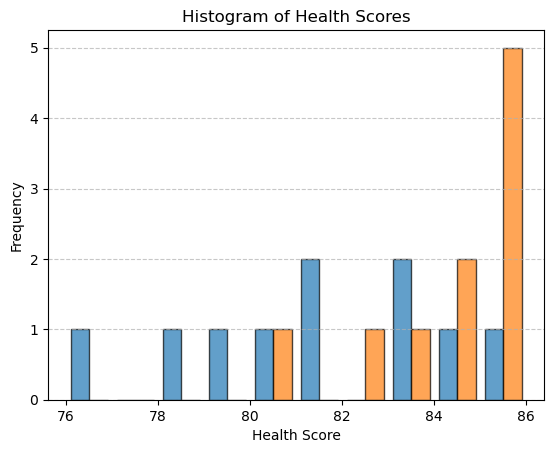

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    df=pd.read_csv(r"C:\Users\User1\OneDrive\Documents\STATS_HW4.csv")
except FileNotFoundError:
    df = pd.DataFrame({"PatientID" : [1,2,3,4,5,6,7,8,9,10], 
                   "Age" : [45,34,29,52,37,41,33,48,26,39],
                  "Gender" : ["M","F","M","F","M","F","M","F","M","F"],
                  "IntialHealthScore" : [84,78,83,81,81,80,79,85,76,83],
                  "FinalHealthScore": [86,86,80,86,84,86,86,82,83,84]})

print(df)
plt.hist((df["IntialHealthScore"],df["FinalHealthScore"]), bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Histogram of Health Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The null hypothesis is what would occur if treatment had no effect. We can represent this as change in health score being zero.
 
$N_0 : S_f - S_I = 0$

The alternative hypothesis is what would occur if treatment had an effect. We can represent this as a positive change in health score.

$N_A : S_f - S_I > 0$

With definitions out of the way, let's do some bootstrapping to get some samples. To generate the code, I ask ChatBot, "How can get some bootstrapped samples of the difference in intialhealthscore and finalhealthscore?". It responded with the following code:

In [31]:
# Calculate the difference between InitialHealthScore and FinalHealthScore
df['ScoreDifference'] = df['FinalHealthScore'] - df['IntialHealthScore']

#Intialize seed
np.random.seed(3141592653)

# Function to generate bootstrapped samples
def bootstrap_samples(data, n_samples=1000):
    boot_means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Get bootstrapped samples of the difference
bootstrapped_differences = bootstrap_samples(df['ScoreDifference'].values)

# Display first 10 bootstrapped means
print(bootstrapped_differences[:10])

[2.1, 1.6, 3.3, 2.4, 1.9, 4.5, 1.9, 3.2, 2.4, 2.6]


I ask "Excellent, now can we get histogram of these bootstrapped_differences?" and with some more help from ChatBot, we can easily make a visual representation of these samples:

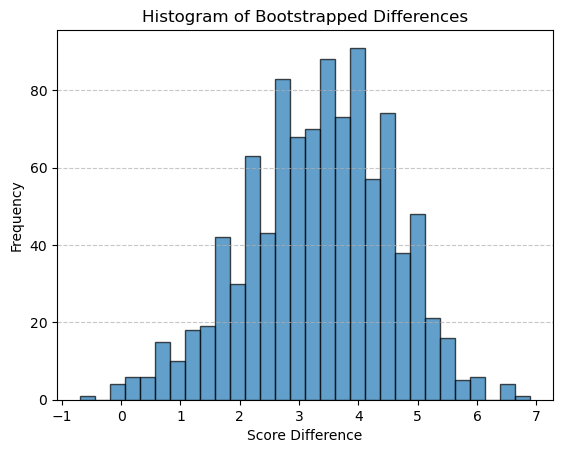

In [32]:
# Plotting the histogram of bootstrapped differences
plt.hist(bootstrapped_differences, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrapped Differences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now to run a formal hypothesis test we need to decide an alpha-level. In many cases of a one-sided z-test, an alpha level of .025 is used. The following code (crafted by ChatBot after I asked "now can we run a one-sided z-test using the standard deviation of the bootstrapped samples (alpha level .025)") will perform a one-sided z-test with an alpha level of .025.

In [34]:
from scipy.stats import norm

# Parameters
alpha = 0.025
hypothesized_mean = 0  # Assuming we want to test if the difference is significantly greater than 0

# Step 1: Calculate mean and standard deviation of bootstrapped differences
boot_mean = np.mean(bootstrapped_differences)
boot_std = np.std(bootstrapped_differences)

# Step 2: Calculate Z-score
z_score = (boot_mean - hypothesized_mean) / boot_std

# Step 3: Calculate p-value for one-sided test (greater than hypothesized_mean)
p_value = 1 - norm.cdf(z_score)

# Step 4: Compare p-value to alpha level
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is evidence that the mean difference is significantly greater than 0.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence that the mean difference is significantly greater than 0.")

Z-score: 2.740355914334696
P-value: 0.003068634237677448
Reject the null hypothesis: There is evidence that the mean difference is significantly greater than 0.


Because the P-value is less than the alpha level, there is sufficient evidence that there was a change in healthscore following treatment. However it is important to note that our sample might not be representative of the entire population and the healthscore may have been caused by outside factors, so our current experiment is unable to determine with certainty the efficacy of this drug.

Apart from the first section of code, all of the following code snippets were crafted by ChatGPT following prompts by me. The entire conservation can be viewed here: https://chatgpt.com/share/66fefaed-30ec-8011-9602-5f4b2213794f

# Question 9

Yes